# Titanic Dataset Analysis
## pivot tables and some visualizations.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
numeric_data = titanic.select_dtypes(include=[np.number])
categorical_data = titanic.select_dtypes(exclude=[np.number])


In [ ]:
numeric_data

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


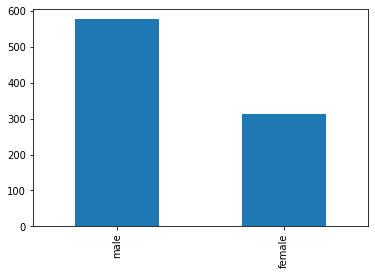

In [ ]:
titanic['sex'].value_counts().plot(kind='bar')

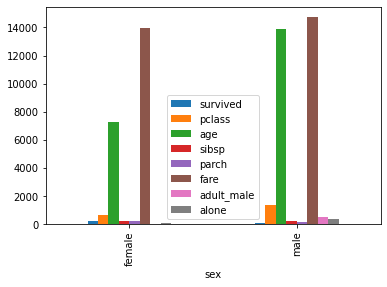

In [ ]:
titanic.groupby('sex').sum().plot(kind='bar') # this graph represent all attributes according to sex column

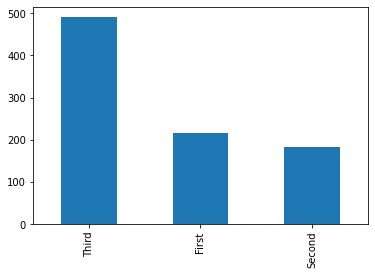

In [ ]:
titanic['class'].value_counts().plot(kind='bar')

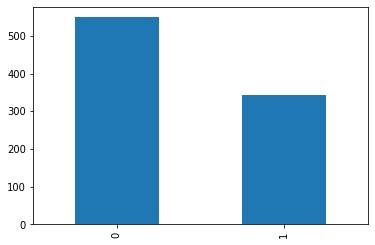

In [ ]:
titanic['survived'].value_counts().plot(kind='bar')

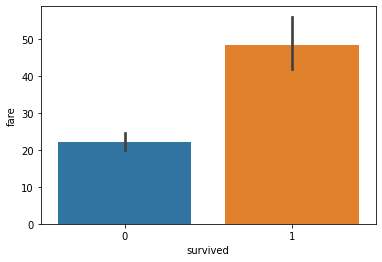

In [ ]:
sns.barplot(x="survived",y='fare', data=titanic)

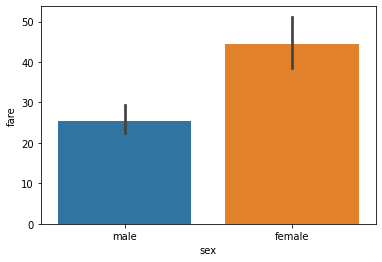

In [ ]:
 sns.barplot(x="sex",y='fare', data=titanic)

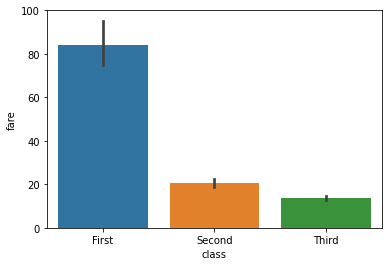

In [ ]:
 sns.barplot(x="class",y='fare', data=titanic)

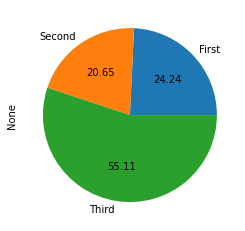

In [ ]:
titanic.groupby('class').size().plot(kind='pie', autopct='%.2f')

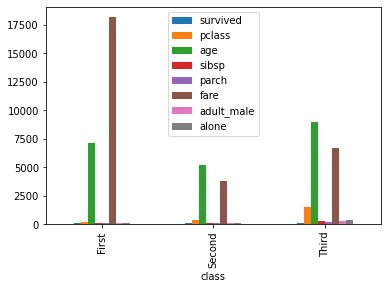

In [ ]:
titanic.groupby('class').sum().plot(kind='bar') # again similar to above graph, grouped by class values 

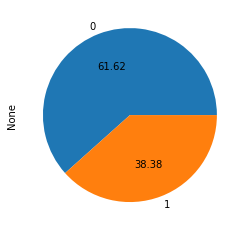

In [ ]:
titanic.groupby('survived').size().plot(kind='pie', autopct='%.2f')

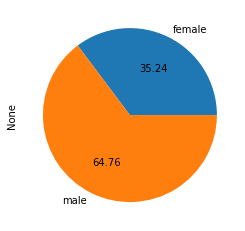

In [ ]:
titanic.groupby('sex').size().plot(kind='pie', autopct='%.2f') # visualized with respect to gender

Please provide histogram plots for numerical values

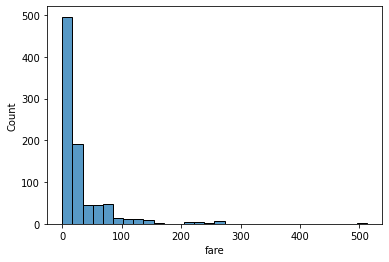

In [ ]:
sns.histplot(data=titanic, x="fare", bins=30)

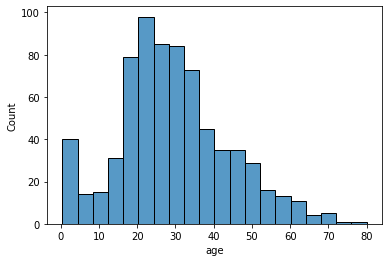

In [ ]:
sns.histplot(data=titanic, x="age", bins=20)

TASK-9C: Please provide visualization for survived rate with respect to gender.


In [ ]:
titanic.groupby('sex')[['survived']].mean() # here I grouped by sex and survived column using mean value

,survived
sex,
female,0.742038
male,0.188908


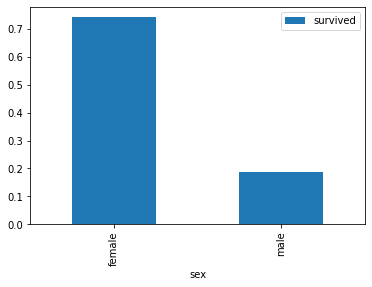

In [ ]:
titanic.groupby('sex')[['survived']].mean().plot(kind='bar') # this graph visualization of the above code

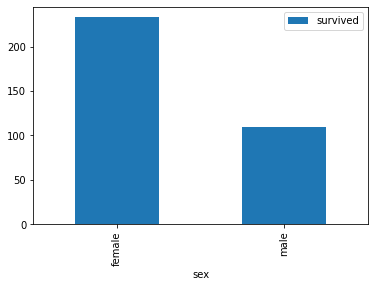

In [ ]:
# Let's try to visualize above graph but this time with sum() value
titanic.groupby('sex')[['survived']].sum().plot(kind='bar') 

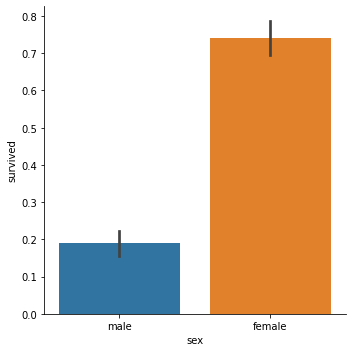

In [ ]:
sns.catplot(x="sex", y="survived", kind="bar", data=titanic);

TASK-9D: Please provide visualization for survived rate with respect to gender and class.

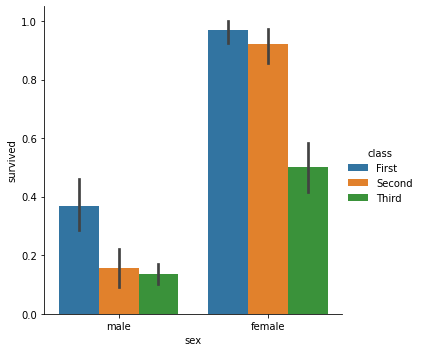

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

TASK-9D: Please provide visualization for survived rate, gender and class.


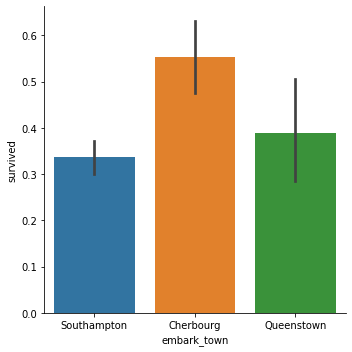

In [ ]:
sns.catplot(x="embark_town", y="survived", kind="bar", data=titanic);

TASK-9E: Please provide visualization for survived rate, embarked and class.


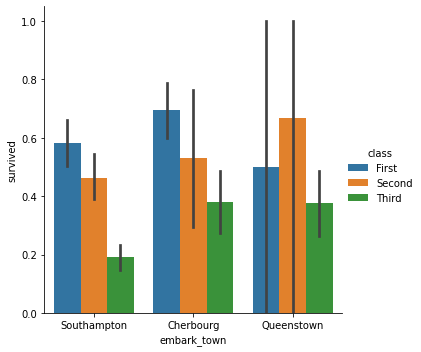

In [ ]:
sns.catplot(x="embark_town", y="survived", hue="class", kind="bar", data=titanic);

In [ ]:
titanic.groupby(['sex', 'class','embark_town'])['survived'].aggregate('mean').unstack() # here rows splitted into two gender, and columns splitted to towns

embark_town    Cherbourg  Queenstown  Southampton
sex    class                                     
female First    0.976744    1.000000     0.958333
       Second   1.000000    1.000000     0.910448
       Third    0.652174    0.727273     0.375000
male   First    0.404762    0.000000     0.354430
       Second   0.200000    0.000000     0.154639
       Third    0.232558    0.076923     0.128302

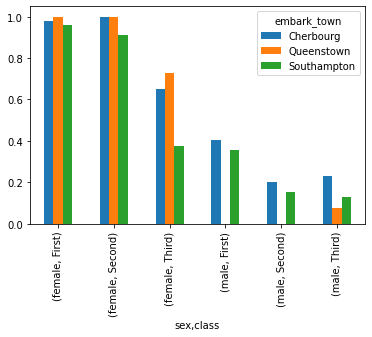

In [ ]:
titanic.groupby(['sex', 'class','embark_town'])['survived'].aggregate('mean').unstack().plot(kind='bar')

TASK-9F: Please provide visualization for survived rate, gender, embarked and class.
Provide a pivot table for this also.


In [ ]:
titanic.pivot_table('survived',['sex','embark_town'],['class'])

class                  First    Second     Third
sex    embark_town                              
female Cherbourg    0.976744  1.000000  0.652174
       Queenstown   1.000000  1.000000  0.727273
       Southampton  0.958333  0.910448  0.375000
male   Cherbourg    0.404762  0.200000  0.232558
       Queenstown   0.000000  0.000000  0.076923
       Southampton  0.354430  0.154639  0.128302

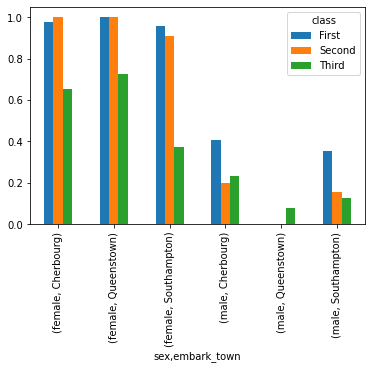

In [ ]:
titanic.pivot_table('survived',['sex','embark_town'],['class']).plot(kind='bar')

In [ ]:
titanic.groupby(['sex', 'class','embark_town'])['survived'].aggregate('sum').unstack() # this table shows number of people in different towns according to their gender

embark_town    Cherbourg  Queenstown  Southampton
sex    class                                     
female First          42           1           46
       Second          7           2           61
       Third          15          24           33
male   First          17           0           28
       Second          2           0           15
       Third          10           3           34

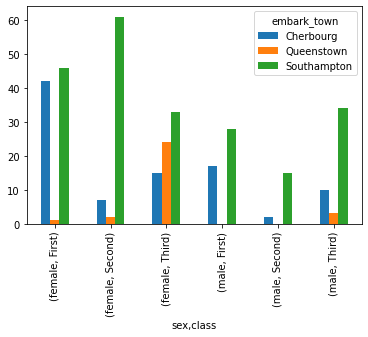

In [ ]:
titanic.groupby(['sex', 'class','embark_town'])['survived'].aggregate('sum').unstack().plot(kind='bar')# and this graph is the visualization of the above code

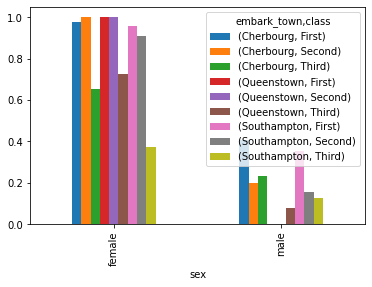

In [ ]:
titanic.pivot_table('survived',['sex'],['embark_town','class']).plot(kind='bar') # this graph similar to above graph but less readable

TASK-9H

 Please provide visualization for survived rate, gender, class and age (in quartiles).


In [ ]:
titanic.pivot_table('age',['survived','class'],['sex']) # first I created two rows survived 0 or 1, then each survied row separated into 3 categories as first, second and third
# and columns separated as female and male

sex                 female       male
survived class                       
0        First   25.666667  44.581967
         Second  36.000000  33.369048
         Third   23.818182  27.255814
1        First   34.939024  36.248000
         Second  28.080882  16.022000
         Third   19.329787  22.274211

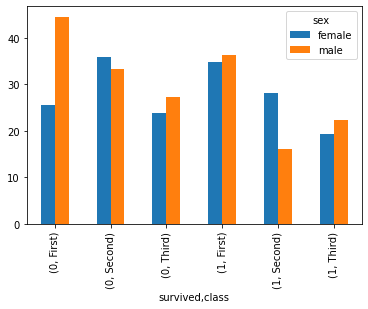

In [ ]:
titanic.pivot_table('age',['survived','class'],['sex']).plot(kind='bar') # above code's visualization

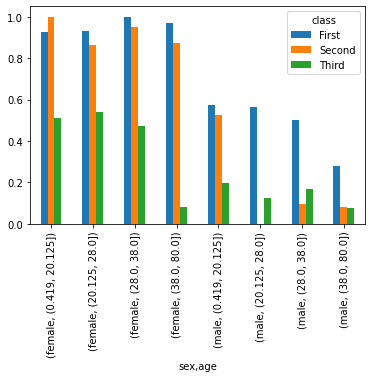

In [ ]:
ages= pd.qcut(titanic['age'],4)
titanic.pivot_table('survived',['sex',ages],'class').plot(kind='bar') # here I used qcut method to divide age into parts